<a href="https://colab.research.google.com/github/foramkavathiya/Projects/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install twitter

     |████████████████████████████████| 51kB 4.3MB/s 


In [37]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
consumer_key = "JGXDsoPEuEztt82fokobAvEUj"
consumer_secret = "NIaa3YIw54Rgmlof7AIuc6Pz06deWEAvfOiF4CVQPFl2LVY95V"
access_token = "1387814540398706688-JtroeoQZInmyLapWCFgJh6GSHPrjcz"
access_token_secret = "KRV88SKaNgJmdys27SNzumx2Ccv2cGvse8dZlkLAuwoLe"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
number_of_tweets = 300
tweets = []
likes = []
time = []
cursor = tweepy.Cursor(api.user_timeline, id = 'JoeBiden', tweet_mode = 'extended').items(number_of_tweets)

for i in cursor:
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  time.append(i.created_at)

In [5]:
df = pd.DataFrame({'tweets' : tweets, 'likes' : likes, 'time' : time})

In [6]:
df.head()

,tweets,likes,time
0,"Together, we are going to build an economy tha...",30847,2021-06-21 21:26:00
1,RT @POTUS: The Child Tax Credit means help dir...,0,2021-06-21 14:05:02
2,"RT @POTUS: Happy Father's Day to the fathers, ...",0,2021-06-20 20:29:40
3,"To honor the true meaning of Juneteenth, we ha...",18649,2021-06-19 14:05:14
4,"RT @POTUS: Today, we’ve passed 300 million sho...",0,2021-06-18 20:14:04


In [7]:
df = df[~df.tweets.str.contains("RT")]

In [8]:
df

,tweets,likes,time
0,"Together, we are going to build an economy tha...",30847,2021-06-21 21:26:00
3,"To honor the true meaning of Juneteenth, we ha...",18649,2021-06-19 14:05:14
6,It’s a big deal that the Affordable Care Act i...,22476,2021-06-17 17:55:46
7,We're on the right track. The American Rescue ...,48013,2021-06-16 21:14:26
9,We’re seeing a coordinated attack on voting ri...,75510,2021-06-15 21:23:11
...,...,...,...
295,"Service is a fitting way to start to heal, uni...",55937,2021-01-17 22:01:00
296,I know masks have become a partisan issue — bu...,657456,2021-01-17 18:50:00
297,"Though pushed, tested, and threatened througho...",55442,2021-01-17 14:51:00
298,"Across the country, approximately 14 million A...",49896,2021-01-17 02:42:00


In [9]:
import nltk
nltk.download('wordnet')
import regex as re
from nltk.stem import WordNetLemmatizer
import spacy
sp = spacy.load('en_core_web_sm')
stopwords = sp.Defaults.stop_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:
def cleanText(text, punctuation = True):
    text = re.sub(r'#', '', text)
    text = re.sub(r'https?:\/\/S+', '', text)
    text = re.sub(r'@[A-Za-z0-9]+','', text)
    text = re.sub(r'[^\x00-\x7F]+','', text)
    text = re.sub('\[[^]]*\]', '', text)
    text = re.sub(r'[^\w\s]', '', text) 
    filtered_text = [word for word in text.split() if word not in stopwords]
    text = " ".join(filtered_text)
    text = text.lower()
    lemma= WordNetLemmatizer()
    lemmatized = []
    for word in text.split():
        lemmatized.append(lemma.lemmatize(word, pos = 'v'))
    text = ' '.join(lemmatized)
    return text

In [11]:
df['tweets'] = df['tweets'].apply(cleanText)

In [12]:
df

,tweets,likes,time
0,together go build economy reward worknot wealt...,30847,2021-06-21 21:26:00
3,to honor true mean juneteenth continue promise...,18649,2021-06-19 14:05:14
6,its big deal affordable care act stay reminder...,22476,2021-06-17 17:55:46
7,be right track the american rescue plan lay st...,48013,2021-06-16 21:14:26
9,be see coordinate attack vote right country it...,75510,2021-06-15 21:23:11
...,...,...,...
295,service fit way start heal unite rebuild count...,55937,2021-01-17 22:01:00
296,i know mask partisan issue patriotic act exper...,657456,2021-01-17 18:50:00
297,though push test threaten 2020 election democr...,55442,2021-01-17 14:51:00
298,across country approximately 14 million americ...,49896,2021-01-17 02:42:00


In [89]:
df = df.reset_index(drop= True)

In [90]:
df

,tweets,likes,time
0,to honor true mean juneteenth continue promise...,18324,2021-06-19 14:05:14
1,its big deal affordable care act stay reminder...,22415,2021-06-17 17:55:46
2,be right track the american rescue plan lay st...,47854,2021-06-16 21:14:26
3,be see coordinate attack vote right country it...,75160,2021-06-15 21:23:11
4,democracy thrive infrastructure democracy stro...,57495,2021-06-15 00:10:25
...,...,...,...
67,under american job plan 100 nations lead pip s...,54244,2021-04-01 00:16:34
68,wall street didnt build countrythe great ameri...,107232,2021-03-31 22:19:30
69,deliver american people american rescue plan i...,19086,2021-03-31 21:10:52
70,the american job plan onceinageneration invest...,25394,2021-03-31 20:52:27


In [91]:
mostlikes = df.loc[df.likes.nlargest(5).index]

In [92]:
mostlikes

,tweets,likes,time
61,get vaccinate america,215160,2021-04-25 21:05:37
65,today adult eligible covid19 vaccine better da...,190999,2021-04-19 20:33:25
7,covid19 vaccines free get vaccinate folks,168214,2021-06-10 17:12:29
41,after year hard work sacrifice rule simple vac...,165518,2021-05-13 20:13:10
36,help spread word from may 24 july 4 uber lyft ...,150858,2021-05-18 15:21:39


In [30]:
tokenized_tweet = df['tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [together, go, build, economy, reward, worknot...
3    [to, honor, true, mean, juneteenth, continue, ...
6    [its, big, deal, affordable, care, act, stay, ...
7    [be, right, track, the, american, rescue, plan...
9    [be, see, coordinate, attack, vote, right, cou...
Name: tweets, dtype: object

In [31]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [32]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_tweet.head()

0    [togeth, go, build, economi, reward, worknot, ...
3    [to, honor, true, mean, juneteenth, continu, p...
6    [it, big, deal, afford, care, act, stay, remin...
7    [be, right, track, the, american, rescu, plan,...
9    [be, see, coordin, attack, vote, right, countr...
Name: tweets, dtype: object

In [34]:
all_words = ' '.join([text for text in df['tweets']])

In [45]:
all_words

'together go build economy reward worknot wealth an economy work backbone country people single day work hard provide families look little bite breathe room to honor true mean juneteenth continue promise equality httpstcotu6m038y8t its big deal affordable care act stay reminder you sign health care httpstco3cykhp8zorhelp spread word be right track the american rescue plan lay strong foundation new economy bring everybody step we pass american job plan build economy work be see coordinate attack vote right country its jim crow 21st century end congress enact legislation easier eligible americans access ballot box prevent attack sacred right vote democracy thrive infrastructure democracy strong people right vote freely fairly conveniently free independent press pursue truth law apply equally regardless look like the pandemic expose badly need invest foundation country work people country thats propose american job planwe need generational investments today succeed tomorrow the covid19 va

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

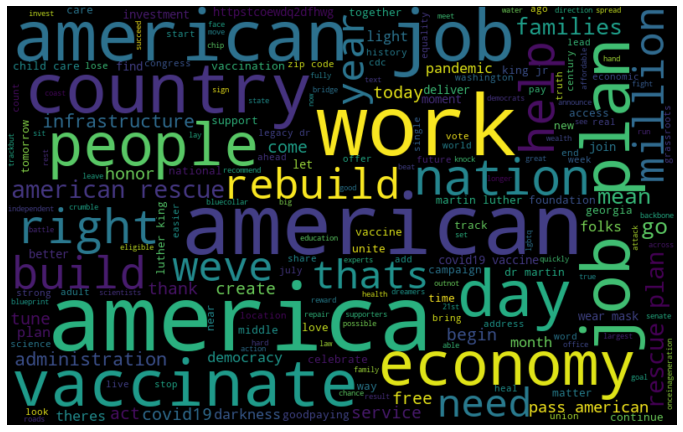

In [38]:
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

bow = vectorizer.fit_transform(df['tweets'])

In [40]:
bow

<96x223 sparse matrix of type '<class 'numpy.int64'>'
	with 849 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(df['tweets'])

In [42]:
from textblob import TextBlob

In [46]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets]

sentiment_objects[0].polarity, sentiment_objects[0]

(-0.18353174603174605,
 TextBlob("Together, we are going to build an economy that rewards work—not just wealth. An economy that works for the backbone of this country: the people who get up every single day to work hard to provide for their families, who are just looking for a little bit of breathing room."))

In [47]:
sentiment_values = [[tweet.sentiment.polarity , str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[-0.18353174603174605,
 'Together, we are going to build an economy that rewards work—not just wealth. An economy that works for the backbone of this country: the people who get up every single day to work hard to provide for their families, who are just looking for a little bit of breathing room.']

In [82]:
sentiment_df = pd.DataFrame(sentiment_values, columns = ['polarity', 'tweets'])
sentiment_df = sentiment_df[~sentiment_df.tweets.str.contains("RT")]

In [83]:
sentiment_df.head()

,polarity,tweets
0,-0.183532,"Together, we are going to build an economy tha..."
3,0.350000,"To honor the true meaning of Juneteenth, we ha..."
6,0.000000,It’s a big deal that the Affordable Care Act i...
7,0.184235,We're on the right track. The American Rescue ...
9,0.142857,We’re seeing a coordinated attack on voting ri...


In [84]:
sentiment_df['tweets'].apply(cleanText)

0      together go build economy reward worknot wealt...
3      to honor true mean juneteenth continue promise...
6      its big deal affordable care act stay reminder...
7      be right track the american rescue plan lay st...
9      be see coordinate attack vote right country it...
                             ...                        
295    service fit way start heal unite rebuild count...
296    i know mask partisan issue patriotic act exper...
297    though push test threaten 2020 election democr...
298    across country approximately 14 million americ...
299    the event tune celebrate america reflect honor...
Name: tweets, Length: 96, dtype: object

In [85]:
sentiment_df

,polarity,tweets
0,-0.183532,"Together, we are going to build an economy tha..."
3,0.350000,"To honor the true meaning of Juneteenth, we ha..."
6,0.000000,It’s a big deal that the Affordable Care Act i...
7,0.184235,We're on the right track. The American Rescue ...
9,0.142857,We’re seeing a coordinated attack on voting ri...
...,...,...
295,0.500000,"Service is a fitting way to start to heal, uni..."
296,0.500000,I know masks have become a partisan issue — bu...
297,0.277778,"Though pushed, tested, and threatened througho..."
298,-0.075000,"Across the country, approximately 14 million A..."


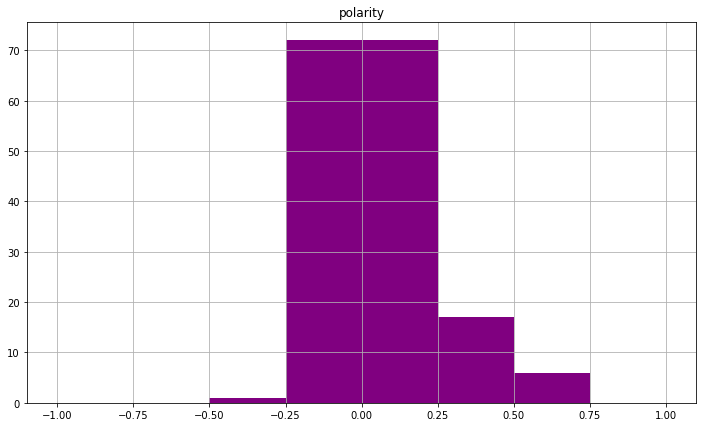

In [86]:
fig, ax = plt.subplots(figsize = (12,7))
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="purple")
plt.show()